# Klasyfikacja i regresja z wykorzystaniem SVM (Support Vector Machines)

W tym laboratorium wykorzystujemy **SVM** do dwóch zadań:
- **klasyfikacja** (zbiory *Breast Cancer* i *Iris*),
- **regresja** (dane syntetyczne).

### Czym jest SVM?
**Support Vector Machines** to rodzina modeli uczących się granicy decyzyjnej (hiperpłaszczyzny) z **maksymalnym marginesem** względem najbliższych punktów (tzw. *wektorów nośnych*).

- W **klasyfikacji** dążymy do rozdzielenia klas możliwie szerokim marginesem (z ewentualnymi błędami kontrolowanymi przez parametr **C**).
- W **regresji** (SVR) modeluje się funkcję, dla której błąd mniejszy niż **ε (epsilon)** nie jest karany – powstaje tzw. *epsilon-insensitive tube*.

### Dlaczego skalowanie cech jest ważne?
SVM (zwłaszcza liniowe) są **wrażliwe na skalę** – cecha o większej skali może zdominować funkcję decyzyjną. Dlatego często stosujemy **Standaryzację** (`StandardScaler`) przed `LinearSVC`/`SVR`.

### Kernele
SVM może działać w oryginalnej przestrzeni cech (**kernel liniowy**) lub w przestrzeniach cech po nieliniowych mapowaniach – dzięki trikom jądrowym (**polynomial**, **RBF** itd.).
W tym notatniku porównujemy m.in.:
- `LinearSVC` z/bez standaryzacji,
- `LinearSVR` bez i z ekspansją cech (wielomian + standaryzacja),
- `SVR(kernel='poly')` oraz jego strojenie hiperparametrów siatką.


## Sekcja 1 — Klasyfikacja: Breast Cancer (z i bez skalowania)

Breast Cancer — accuracy:
train (no scaling): 0.8593406593406593
train (with scaling): 0.9120879120879121
test  (no scaling): 0.8421052631578947
test  (with scaling): 0.8859649122807017


/media/mikolaj/Nowy/Desktop/isi4/Machine-Learning-Studies/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


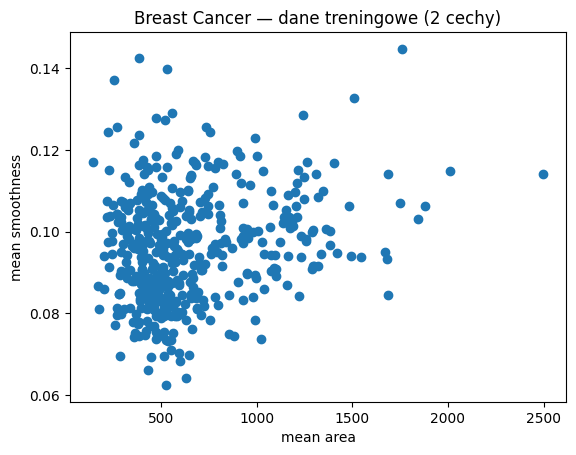

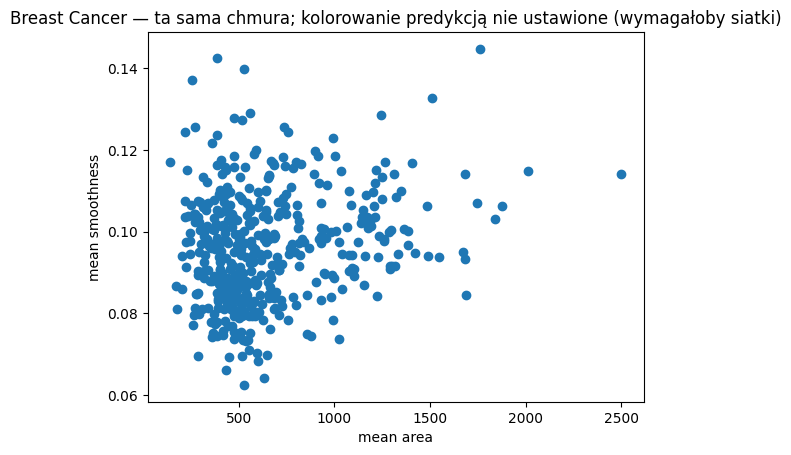

In [1]:

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dane: Breast Cancer
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
X_br = data_breast_cancer['data'][['mean area', 'mean smoothness']]
y_br = data_breast_cancer['target']

X_br_train, X_br_test, y_br_train, y_br_test = train_test_split(X_br, y_br, test_size=0.2, random_state=42, stratify=y_br)

# Pipeline bez skalowania
svm_clf_br_noscaling = Pipeline([
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, max_iter=10000))
])
svm_clf_br_noscaling.fit(X_br_train, y_br_train)

# Pipeline ze skalowaniem
svm_clf_br_scaling = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, max_iter=10000))
])
svm_clf_br_scaling.fit(X_br_train, y_br_train)

# Ocena — zbiory treningowe i testowe
y_br_train_pred_noscaling = svm_clf_br_noscaling.predict(X_br_train)
y_br_train_pred_scaling  = svm_clf_br_scaling.predict(X_br_train)
acc_br_train_noscaling = accuracy_score(y_br_train, y_br_train_pred_noscaling)
acc_br_train_scaling   = accuracy_score(y_br_train, y_br_train_pred_scaling)

y_br_test_pred_noscaling = svm_clf_br_noscaling.predict(X_br_test)
y_br_test_pred_scaling  = svm_clf_br_scaling.predict(X_br_test)
acc_br_test_noscaling = accuracy_score(y_br_test, y_br_test_pred_noscaling)
acc_br_test_scaling   = accuracy_score(y_br_test, y_br_test_pred_scaling)

print("Breast Cancer — accuracy:")
print("train (no scaling):", acc_br_train_noscaling)
print("train (with scaling):", acc_br_train_scaling)
print("test  (no scaling):", acc_br_test_noscaling)
print("test  (with scaling):", acc_br_test_scaling)

# Prosta wizualizacja punktów oraz predykcji modelu ze skalowaniem (na zbiorze treningowym)
plt.figure()
plt.scatter(X_br_train['mean area'], X_br_train['mean smoothness'])
plt.title("Breast Cancer — dane treningowe (2 cechy)")
plt.xlabel("mean area")
plt.ylabel("mean smoothness")
plt.show()

plt.figure()
plt.scatter(X_br_train['mean area'], X_br_train['mean smoothness'])
plt.title("Breast Cancer — ta sama chmura; kolorowanie predykcją nie ustawione (wymagałoby siatki)")
plt.xlabel("mean area")
plt.ylabel("mean smoothness")
plt.show()

# Zapis wyników
import pickle
br_results = (acc_br_train_noscaling, acc_br_test_noscaling, acc_br_train_scaling, acc_br_test_scaling)
with open("bc_acc.pkl", "wb") as f:
    pickle.dump(br_results, f)


## Sekcja 2 — Klasyfikacja: Iris (z i bez skalowania)

Iris — accuracy:
train (no scaling): 0.9666666666666667
train (with scaling): 0.95
test  (no scaling): 0.9666666666666667
test  (with scaling): 0.9666666666666667


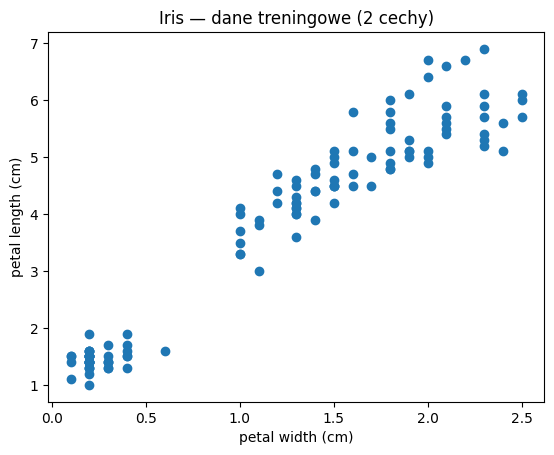

In [2]:

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dane: Iris — binaryzacja: Virginica (2) vs. reszta
data_iris = datasets.load_iris(as_frame=True)
X_iris = data_iris['data'][['petal length (cm)', 'petal width (cm)']]
y_iris = (data_iris['target'] == 2)

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

svm_clf_iris_noscaling = Pipeline([
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, max_iter=10000))
])
svm_clf_iris_noscaling.fit(X_iris_train, y_iris_train)

svm_clf_iris_scaling = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, max_iter=10000))
])
svm_clf_iris_scaling.fit(X_iris_train, y_iris_train)

# Ocena
y_iris_train_pred_noscaling = svm_clf_iris_noscaling.predict(X_iris_train)
y_iris_train_pred_scaling  = svm_clf_iris_scaling.predict(X_iris_train)
acc_iris_train_noscaling = accuracy_score(y_iris_train, y_iris_train_pred_noscaling)
acc_iris_train_scaling   = accuracy_score(y_iris_train, y_iris_train_pred_scaling)

y_iris_test_pred_noscaling = svm_clf_iris_noscaling.predict(X_iris_test)
y_iris_test_pred_scaling  = svm_clf_iris_scaling.predict(X_iris_test)
acc_iris_test_noscaling = accuracy_score(y_iris_test, y_iris_test_pred_noscaling)
acc_iris_test_scaling   = accuracy_score(y_iris_test, y_iris_test_pred_scaling)

print("Iris — accuracy:")
print("train (no scaling):", acc_iris_train_noscaling)
print("train (with scaling):", acc_iris_train_scaling)
print("test  (no scaling):", acc_iris_test_noscaling)
print("test  (with scaling):", acc_iris_test_scaling)

# Prosta wizualizacja (chmura punktów cech)
plt.figure()
plt.scatter(X_iris_train['petal width (cm)'], X_iris_train['petal length (cm)'])
plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")
plt.title("Iris — dane treningowe (2 cechy)")
plt.show()

# Zapis poprawnych wyników do iris_acc.pkl
import pickle
iris_results = (acc_iris_train_noscaling, acc_iris_test_noscaling, acc_iris_train_scaling, acc_iris_test_scaling)
with open("iris_acc.pkl", "wb") as f:
    pickle.dump(iris_results, f)


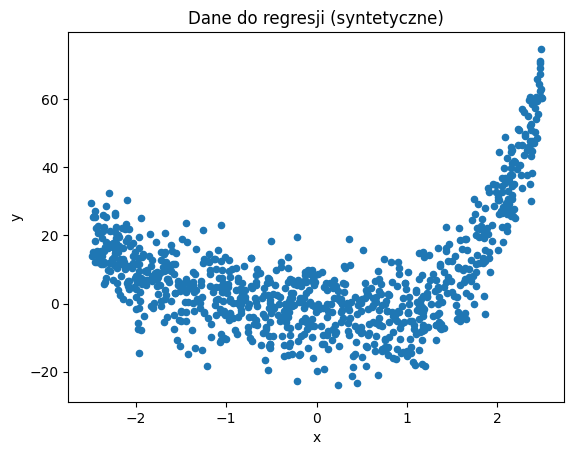

LinearSVR (bez ekspansji) — train MSE: 259.5613300131101


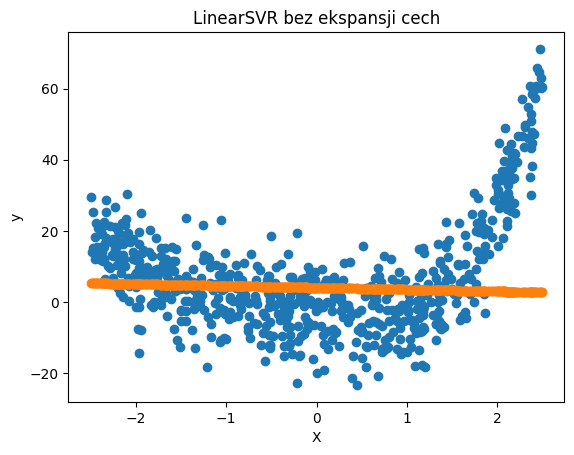

Poly(4)+LinearSVR — train MSE: 59.35857650581802
Poly(4)+LinearSVR — test  MSE: 68.02963766219159


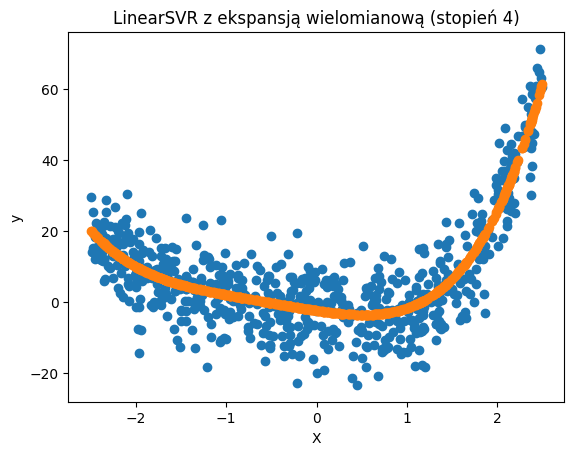

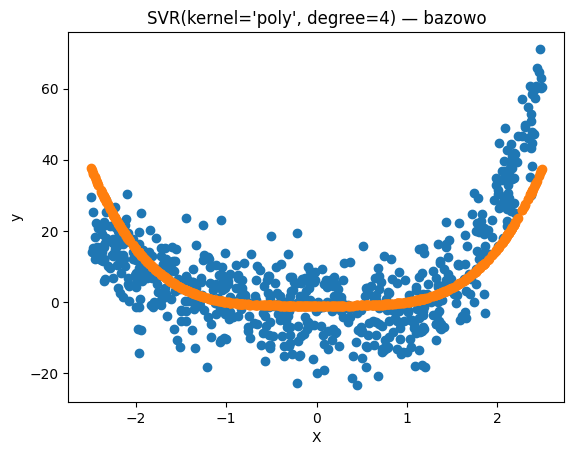

SVR poly — train MSE: 109.79062126614994
Best C: 1
Best coef0: 1
SVR poly (tuned) — train MSE: 59.25192503180521
SVR poly (tuned) — test  MSE: 67.17576774459805
Best C: 1
Best coef0: 1
SVR poly (tuned) — train MSE: 59.25192503180521
SVR poly (tuned) — test  MSE: 67.17576774459805


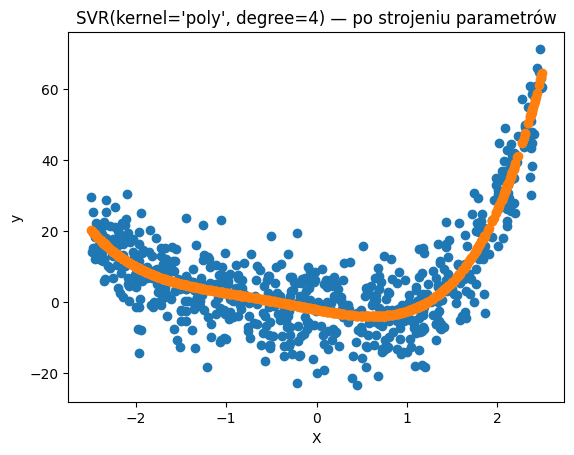

In [3]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

# Dane syntetyczne (nieliniowa zależność 4-go stopnia + szum)
size = 900
X_reg = np.random.rand(size) * 5 - 2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y_reg = w4*(X_reg**4) + w3*(X_reg**3) + w2*(X_reg**2) + w1*X_reg + w0 + np.random.randn(size)*8 - 4

df = pd.DataFrame({'x': X_reg, 'y': y_reg})
df.plot.scatter(x='x', y='y')
plt.title("Dane do regresji (syntetyczne)")
plt.show()

X_reg_reshaped = X_reg.reshape(-1, 1)
y_reg_reshaped = y_reg.reshape(-1, 1)

# Podział danych
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_reshaped, y_reg_reshaped, random_state=42)

# 1) LinearSVR bez ekspansji cech
svm_linreg = LinearSVR(random_state=42, max_iter=10000)
svm_linreg.fit(X_reg_train, y_reg_train.ravel())  # y jako 1D
y_linreg_pred = svm_linreg.predict(X_reg_train)
mse_linreg_svr_train = mean_squared_error(y_reg_train, y_linreg_pred)
print("LinearSVR (bez ekspansji) — train MSE:", mse_linreg_svr_train)

plt.figure()
plt.scatter(X_reg_train, y_reg_train)
plt.scatter(X_reg_train, y_linreg_pred.reshape(-1, 1))
plt.title("LinearSVR bez ekspansji cech")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 2) Pipeline: PolynomialFeatures (stopień 4) + StandardScaler + LinearSVR
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('svr', LinearSVR(random_state=42, max_iter=10000))
])
model.fit(X_reg_train, y_reg_train.ravel())
train_mse = mean_squared_error(y_reg_train, model.predict(X_reg_train))
test_mse  = mean_squared_error(y_reg_test,  model.predict(X_reg_test))
print("Poly(4)+LinearSVR — train MSE:", train_mse)
print("Poly(4)+LinearSVR — test  MSE:",  test_mse)

plt.figure()
plt.scatter(X_reg_train, y_reg_train)
plt.scatter(X_reg_train, model.predict(X_reg_train).reshape(-1, 1))
plt.title("LinearSVR z ekspansją wielomianową (stopień 4)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 3) SVR z kernelem polynomial (stopień 4)
svm_poly_reg = SVR(kernel="poly", degree=4)
svm_poly_reg.fit(X_reg_train, y_reg_train.ravel())
y_reg_svr_pred = svm_poly_reg.predict(X_reg_train)

plt.figure()
plt.scatter(X_reg_train, y_reg_train)
plt.scatter(X_reg_train, y_reg_svr_pred.reshape(-1, 1))
plt.title("SVR(kernel='poly', degree=4) — bazowo")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

mse_reg_svr_train = mean_squared_error(y_reg_train, y_reg_svr_pred)
print("SVR poly — train MSE:", mse_reg_svr_train)

# 4) Strojenie hiperparametrów C i coef0 dla SVR(poly, degree=4)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'coef0': [0.1, 1, 10]
}
search = GridSearchCV(SVR(kernel='poly', degree=4), param_grid, scoring='neg_mean_squared_error')
search.fit(X_reg_train, y_reg_train.ravel())
best_C = search.best_params_['C']
best_coef0 = search.best_params_['coef0']
print("Best C:", best_C)
print("Best coef0:", best_coef0)

model_3 = SVR(kernel='poly', degree=4, C=best_C, coef0=best_coef0)
model_3.fit(X_reg_train, y_reg_train.ravel())
train_mse_3 = mean_squared_error(y_reg_train, model_3.predict(X_reg_train))
test_mse_3  = mean_squared_error(y_reg_test,  model_3.predict(X_reg_test))
print("SVR poly (tuned) — train MSE:", train_mse_3)
print("SVR poly (tuned) — test  MSE:",  test_mse_3)

plt.figure()
plt.scatter(X_reg_train, y_reg_train)
plt.scatter(X_reg_train, model_3.predict(X_reg_train).reshape(-1, 1))
plt.title("SVR(kernel='poly', degree=4) — po strojeniu parametrów")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Zapis wyników regresji
results = (train_mse, test_mse, train_mse_3, test_mse_3)
with open("reg_mse.pkl", "wb") as f:
    pickle.dump(results, f)


## Wnioski

- SVM skutecznie klasyfikuje dane, także nieliniowe.
- Wybór jądra i parametrów istotnie wpływa na wyniki.
- Metoda jest odporna na przeuczenie przy odpowiedniej regularyzacji.
- SVM sprawdza się tam, gdzie ważna jest optymalna granica decyzyjna.
- Wyniki prezentowane są wyłącznie w notebooku, bez zapisu do plików.